In [3]:
# transform dummy variables
import pandas as pd

fruits = pd.DataFrame({'Num_feature':[5, 6, 7, 8, 9], 'Type_feature':['a', 'b', 'c', 'd', 'e']})
display(fruits)

fruits['Num_feature'] = fruits['Num_feature'].astype(str)
pd.get_dummies(fruits, columns=['Num_feature'])

,Num_feature,Type_feature
0,5,a
1,6,b
2,7,c
3,8,d
4,9,e


,Type_feature,Num_feature_5,Num_feature_6,Num_feature_7,Num_feature_8,Num_feature_9
0,a,1,0,0,0,0
1,b,0,1,0,0,0
2,c,0,0,1,0,0
3,d,0,0,0,1,0
4,e,0,0,0,0,1


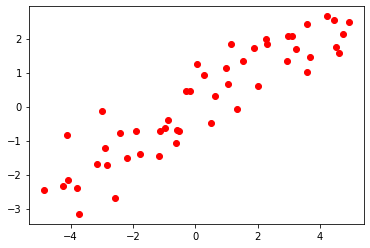

In [7]:
# data binning / discretization sample
import numpy as np
import matplotlib.pyplot as plt

rnd = np.random.RandomState(38)
x = rnd.uniform(-5, 5, size=50)
y_no_noise = (np.cos(6 * x) + x)
X = x.reshape(-1, 1)
y = (y_no_noise + rnd.normal(size=len(x))) / 2

plt.plot(X, y, 'o', c='r')
plt.show()

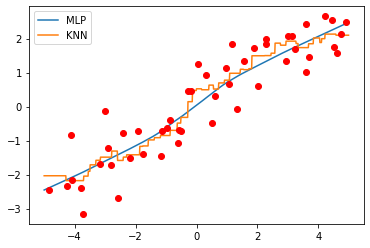

In [9]:
# before data binning
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

line = np.linspace(-5, 5, 1000, endpoint=False).reshape(-1, 1)
mlpr = MLPRegressor().fit(X, y)
knr = KNeighborsRegressor().fit(X, y)

plt.plot(line, mlpr.predict(line), label='MLP')
plt.plot(line, knr.predict(line), label='KNN')
plt.plot(X, y, 'o', c='r')
plt.legend(loc='best')
plt.show()

(50, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


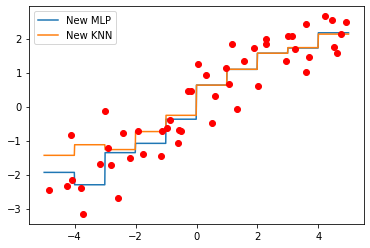

In [15]:
# data binning
from sklearn.preprocessing import OneHotEncoder

bins = np.linspace(-5, 5, 11)
target_bin = np.digitize(X, bins=bins)
onehot = OneHotEncoder(sparse=False)
onehot.fit(target_bin)

X_in_bin = onehot.transform(target_bin)
print(X_in_bin.shape)
print(X_in_bin[:10])

# redo MLP and KNN
new_line = onehot.transform(np.digitize(line, bins=bins))
new_mlpr = MLPRegressor().fit(X_in_bin, y)
new_knr = KNeighborsRegressor().fit(X_in_bin, y)

plt.plot(line, new_mlpr.predict(new_line), label = 'New MLP')
plt.plot(line, new_knr.predict(new_line), label = 'New KNN')
plt.plot(X, y, 'o', c='r')
plt.legend(loc='best')
plt.show()

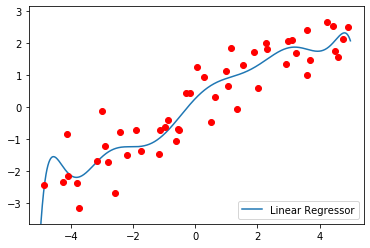

In [19]:
# Interaction Features
#np.hstack()

# Polynomial Features -> transform x to higher degree polynomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X)
LNR_poly = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)

plt.plot(line, LNR_poly.predict(line_poly), label='Linear Regressor')
plt.xlim(np.min(X) - 0.5, np.max(X) + 0.5)
plt.ylim(np.min(y) - 0.5, np.max(y) + 0.5)
plt.plot(X, y, 'o', c='r')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Auto Feature Selection in sklearn
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

sfm = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=38), threshold='median')
sfm.fit(X_train_scaled, y_train)
X_train_sfm = sfm.transform(X_train_scaled)

In [ ]:
# Recursive Feature Elimination, RFE
from sklearn.feature_selection import RFE
rfe = RFE(RandomForestRegressor(n_estimators=100, random_state=38), n_features_to_select=12)
rfe.fit(X_train_scaled, y_train)
X_train_rfe = rfe.transform(X_train_scaled)